# ROI Stand Alone Service

# 0. Imports

1. Verander **git_dir** in de map op jouw computer met de code. <br>
2. Run vervolgens de cell door met de **Run** knop bovenin het scherm of door **ctrl+enter** te drukken. <br>
Het bolletje rechts boven geeft aan of het notebook bezig is (naast Python 3 (ipykernel)). Als deze zwart gekleurd is, dan is het notebook bezig.<br>
Als er "Imports are succesfull!" onder de cell komt te staan na het uitvoeren, dan is deze cell succesvol uitgevoerd. <br>

In [1]:
import os
import sys
import shutil

%load_ext autoreload
%autoreload 2

# insert the directory where you extracted the zip file here:
git_dir = r"C:\Work\Projects\HL-P24050_ROI\05_Analysis\P1414"

sys.path.append(os.path.join(git_dir, 'Code'))
sys.path.append(os.path.join(git_dir, 'HydroLogic_Inundation_toolbox'))
sys.path.append(os.path.join(git_dir, 'HydroLogic_Inundation_toolbox/Readers'))

from notebooks.background_scripting.v1.test_connection import TestConnection
test_connection = TestConnection()

Imports are succesfull!


# 1. Model specifications 

## 1.1. Select basemodel
De widgets zijn alleen te zien als je het notebook zelf runt! In de documentatie zijn deze niet zichtbaar. <br>
1. Run de cell hieronder.<br>
2. Vul in de widget "path to folder with models" de map in waarin de gedownloade modellen staan. <br>
3. Vervolgens klik je update settings en kan je een model selecteren in de lijst. <br>
4. Je kan het scenario dat je wil door rekenen ook een naam geven, door deze in te vullen bij "Scenario name". <br>
5. Ten slotte klik je wederom op update settings.

In [2]:
from notebooks.background_scripting.v1.select_basemodel import ModelSettings

model_settings = ModelSettings(git_dir)
model_settings.display_widgets()

Button(description='Update settings', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_colo…

Output()

'Model settings are:'

{
    "folder": "C:\\Work\\Projects\\HL-P24050_ROI\\05_Analysis\\SAS_workdir\\run_model\\model_database",
    "model": "Export_Combined_V2.4_500m_ALL_no_coupures_2D_withMaaS",
    "scenario_name": "run"
}


## 1.2. Model settings
1. Run de cell hieronder.<br>
2. Kies de start- en stoptijd van het model. <br>
3. Kies de interval om resultaten weg te schrijven bij "Interval to write map file". <br>
4. Vul de locatie in van het D-HYDRO script _run_dimr.bat_. Dit scripts is te vinden in de map van je D-HYDRO installatie. De map is waarschijnlijk vergelijkbaar aan de standaard waarde in de widget "Location of dhydro run_dimr". <br>
5. Klik op "Update settings <br>

In [3]:
from notebooks.background_scripting.v1.modify_mdu import ModifyMDU, copy_model

model_path = copy_model(os.path.join(model_settings.settings['folder'], model_settings.settings['model']), model_settings.settings['scenario_name'])
modify_mdu = ModifyMDU(model_path)
modify_mdu.display_widgets()

Button(description='Update settings', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_colo…

Output()

'MDU settings are:'

{
    "tStart": 0.0,
    "tStop": 12.0,
    "mapInterval": 20.0,
    "DHYDRO location": "C:\\Program Files\\Deltares\\D-HYDRO Suite 2024.03 1D2D\\plugins\\DeltaShell.Dimr\\kernels\\x64\\bin\\run_dimr.bat"
}


## 1.3.1. Dambreak location
Kies hieronder zelf een dambreak locatie. Bij een hoge resolutie kan het eventjes duren voordat de kaart verschijnt. <br> 
1. Selecteer waar je ongeveer een damdoorbraak wil gaan doorrekenen. <br>
2. Run de cell hieronder. Dit kan iets langer duren dan de vorige cellen.<br>
3. Kies de locatie van je damdoorbraak. Dit doe je door een lijn te trekken door een dam (rood) heen. Deze lijn moet ook een 1D2D link (groen) snijden. Probeer je lijn parralel aan de dam te tekenen, maar wel snijdend door de dam (rood) en de 1D2D link (groen). Het kan even duren voordat alle dammen en links zichtbaar zijn. <br>
4. Kies het benedenstroomse punt (grid cell) waar het water naar toe stroomt. <br>
5. Bekijk je geselecteerde locatie. Als je niet tevereden bent, run deze cell dan opnieuw.

In [22]:
from notebooks.background_scripting.v1.modify_dambreak_v3 import DambreakWidget

dambreakWidget = DambreakWidget(model_path)
dambreakWidget.draw_map()

Map(center=[51.90915, 4.74685], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

HTML(value='<b style="color:black;font-size:18px;">Done! Inspect your results (4/4) </b>')

HTML(value='')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\xdc\x00\x00\x03\xbe\x08\x02\x00\x00\x00\x91\xbb@…

## 1.4. Dambreak settings
Specificeer de parameters van de Dambreak <br>
1. Run de cell hieronder.<br>
2. Vul alle velden in met de waardes die je wil.<br>
3. Klik op "update settings". 

In [6]:
from notebooks.background_scripting.v1.modify_dambreak_v3 import ModifyDambreak

add_dambreak = ModifyDambreak(model_path, dambreakWidget.settings, dambreakWidget.keringen, False, None)
add_dambreak.display_widgets()

Button(description='Update settings', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_colo…

Output()

'Dambreak settings are:'

{
    "crestLevelIni": -2.0,
    "t0": 0.0,
    "crestLevelMin": -2.0,
    "breachWidthIni": 5.0,
    "f1": 1.3,
    "f2": 0.04,
    "uCrit": 0.2
}


## 1.5. Boundary conditions
Specificeer de randvoorwaarden van het model. <br>
1. Run de cell hieronder.<br>
2. Voor iedere randvoowaarde verschijnt er een venster met parameters die je kunt aanpassen. Je hebt twee opties: aanpassen via de parameters, of een randvoorwaarde opleggen via een csv bestand.
2.1.  Als je een csv wil gebruiken, maak dan een csv met 2 kolommen. Voer de locatie van het CSV bestand in in het invulvenster. <br>
2.2.  Als je de generatie via parameters wil gebruiken, laat het invulveld voor het CSV bestand dan leeg, en vul de parameters in.
3. Klik op "update settings", je ziet dan de huidige instellingen. Je kan dingen nu verder aanpassen, en opnieuw op "update settings" klikken, totdat je tevreden bent.


Button(description='Update settings', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_colo…

Output()

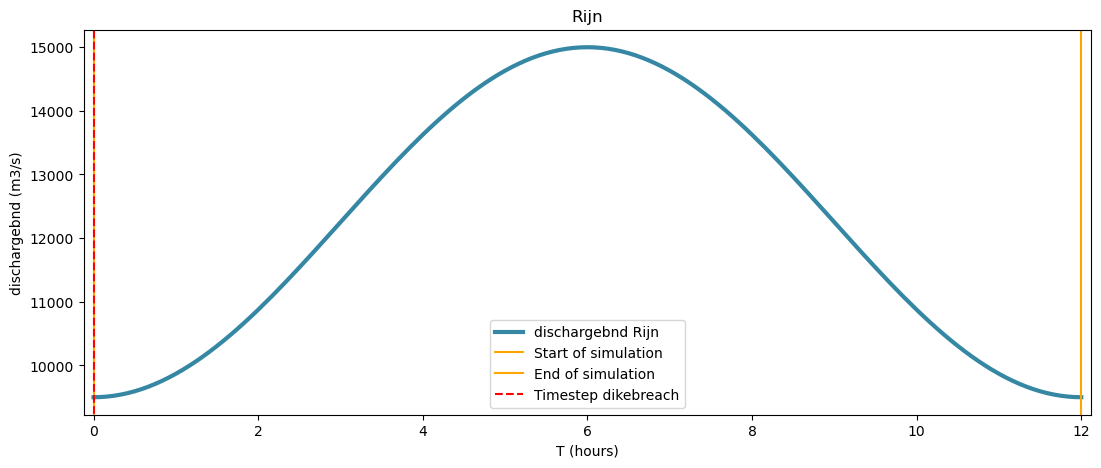

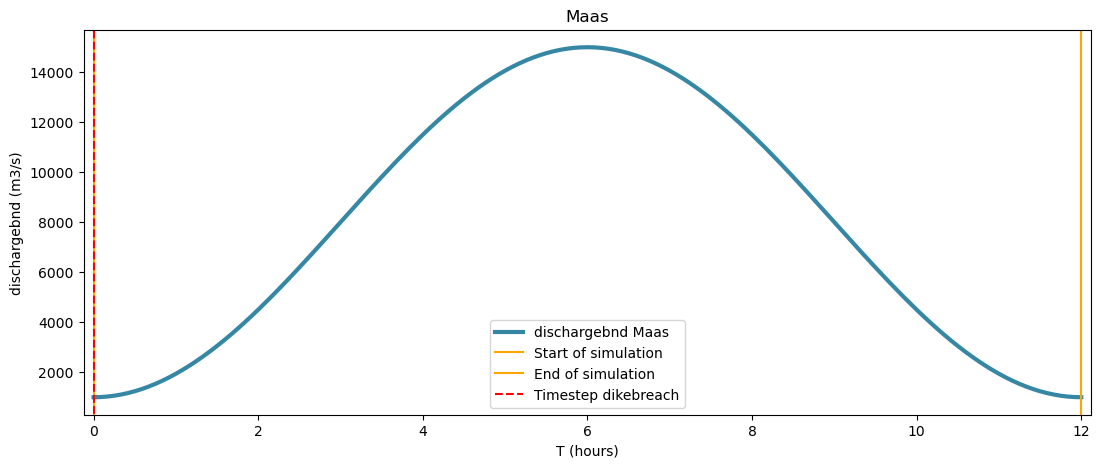

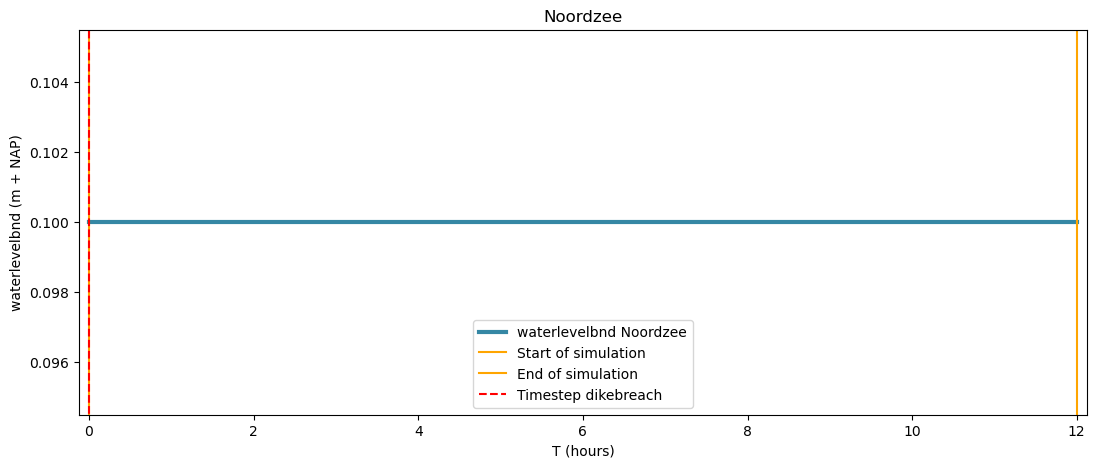

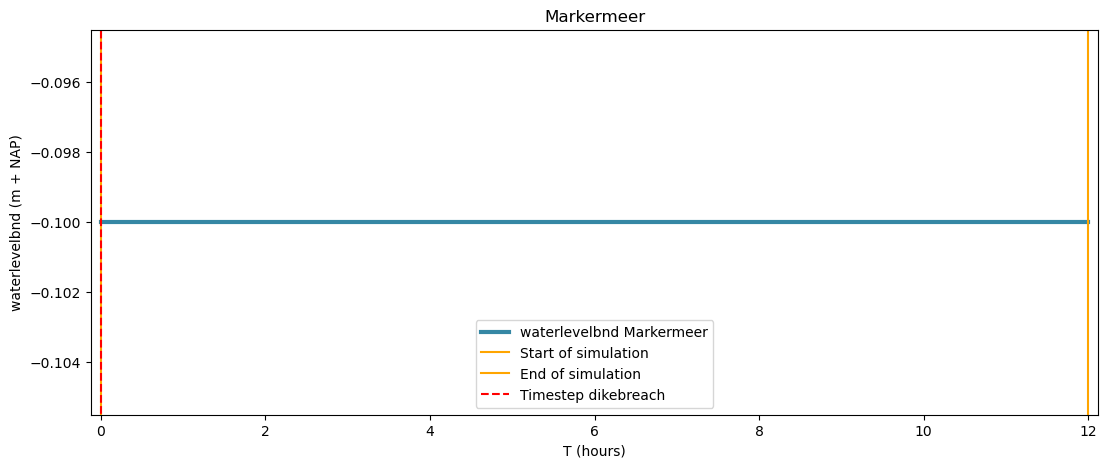

In [7]:
from notebooks.background_scripting.v1.modify_boundaries_v2 import ModifyBoundaries
    
modify_boundaries = ModifyBoundaries(model_path, modify_mdu.settings, add_dambreak.dambreak_settings)
modify_boundaries.display_widgets()

# 2. Run Model
Voer een simulatie uit. <br>
1. Run de cell hieronder. <br>
2. Klik op "Run model" <br>
3. Het model begint nu. Eerst moet het model initialiseren, dit kan een tijdje duren. Hierna zal het progressie balkje vol lopen. 

In [8]:
from notebooks.background_scripting.v1.model_runner import ModelRunner

model_runner = ModelRunner(model_path)
model_runner.display_widgets()

Button(description='Run model!', layout=Layout(height='35px', width='99%'), style=ButtonStyle(button_color='#3…

Output()

# 3. Post processing

## 3.1. Plot map
Visualiseer de resultaten op kaart. <br>
1. Run de cell hieronder.<br>
2. Voer de gewenste parameters in voor de plot. <br>
3. Klik op "Plot map". De eerste plot duurt iets langer.<br>
Indien je een ander model wil bekijken dan je hebt doorgerekend, dan kan je dat doen door in de cell hieronder een nieuw model_path toe te voegen. Voeg de volgende regel toe: <br>
_model_path = r"PATH_TO_MODEL"_

In [ ]:
from notebooks.background_scripting.v1.post_processing import PlotSettingsMap

plot_settings = PlotSettingsMap(model_path)
plot_settings.display_widgets()

## 3.2. Plot dambreak
Maak grafieken van de dambreak variabelen.

1. Run de cell hieronder.<br>
2. Voer de gewenste parameters in voor de plot. <br>
3. Klik op "Plot breach information".<br>
Indien je een ander model wil bekijken dan je hebt doorgerekend (of als je niks wil doorrekenen), dan kan je dat doen door in de cell hieronder een nieuw model_path toe te voegen. Voeg de volgende lijn toe: <br>
_model_path = r"PATH_TO_MODEL"_

In [ ]:
from notebooks.background_scripting.v1.post_processing import PlotSettingsBreach, BreachPlotter

plot_settings = PlotSettingsBreach(model_path)
plot_settings.display_widgets()